# This is a project about Bitcoin.

### The bitcoin is increasing too fast, so let's see  how much people had gained with it.

...

In [156]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [157]:
df1 = pd.read_csv('C:/Users/GEANUM.Fé/Documents/Project-A/BTCUSD_day.csv')
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


#### We will rename the columns Symbol to Instrument.

In [158]:
df1.columns = ['Date', 'Instrument', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'VolumeUSD']
df1.head(2)

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53


In [159]:
df1 = df1.sort_values(by='Date')

In [160]:
df = df1.reset_index(drop=True)

In [161]:
df.head()

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD
0,2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
1,2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2,2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
3,2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
4,2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


#### As we can see above, we have eight columns, and now let's use some methods to analyze this data.

In [162]:
df.isna().sum()

Date          0
Instrument    0
Open          0
High          0
Low           0
Close         0
VolumeBTC     0
VolumeUSD     0
dtype: int64

In [163]:
df.corr()

,Open,High,Low,Close,VolumeBTC,VolumeUSD
Open,1.000000,0.998338,0.997104,0.996786,0.183445,0.564257
High,0.998338,1.000000,0.996403,0.998504,0.199262,0.581371
Low,0.997104,0.996403,1.000000,0.998124,0.151037,0.524840
Close,0.996786,0.998504,0.998124,1.000000,0.179781,0.559752
VolumeBTC,0.183445,0.199262,0.151037,0.179781,1.000000,0.741073
VolumeUSD,0.564257,0.581371,0.524840,0.559752,0.741073,1.000000


#### Now we can looking for correlations.

(0, 589228758.2922559)

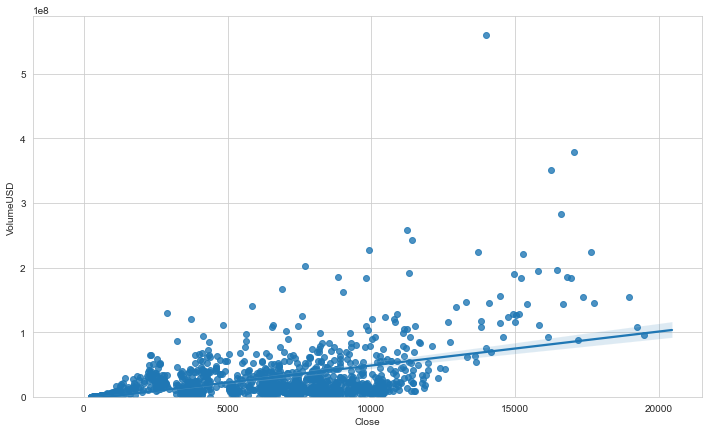

In [164]:
plt.figure(figsize=(12,7))
sns.regplot(x='Close', y='VolumeUSD', data=df)
plt.ylim(0,)

(0, 589839375.7626946)

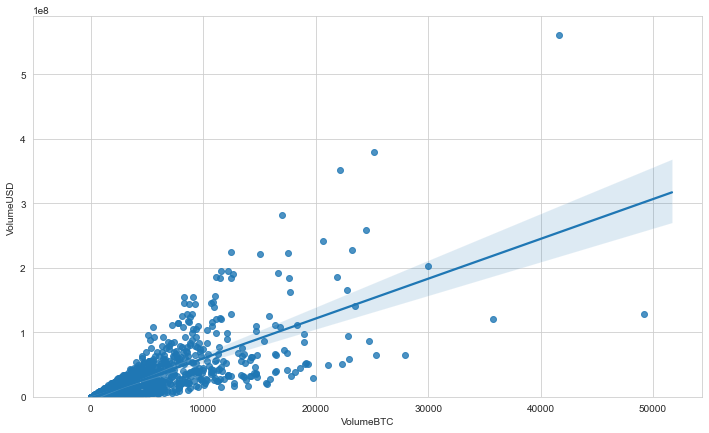

In [165]:
plt.figure(figsize=(12,7))
sns.regplot(x='VolumeBTC', y='VolumeUSD', data=df)
plt.ylim(0,)

#### We found out correlation but  we don't need use all of them, we will only use the column Close.

In [166]:
df.describe()

,Open,High,Low,Close,VolumeBTC,VolumeUSD
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1.647000e+03
mean,4823.493224,4971.083673,4656.335337,4827.596515,3789.357365,2.129125e+07
std,3937.740533,4078.527350,3760.335160,3936.503969,4436.695998,3.694968e+07
min,242.500000,245.000000,236.000000,243.950000,0.000000,0.000000e+00
25%,741.975000,751.830000,732.030000,742.260000,1028.940000,1.659287e+06
50%,4147.100000,4295.090000,4000.000000,4154.840000,2263.370000,9.395394e+06
75%,7920.510000,8139.750000,7630.445000,7920.510000,4918.785000,2.464551e+07
max,19499.990000,19999.000000,18870.000000,19499.990000,49229.150000,5.606539e+08


#### Let's create a column called Close1, that is the closing of operation of one day later, so we can see the day of tomorrow and compare it with today.

In [167]:
df['Close1'] = df['Close'].shift(-1)
df.tail(3)

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD,Close1
1644,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,7315.25
1645,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,7315.25
1646,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00,NaN


In [168]:
df = df.iloc[:1646]
df.tail(3)

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD,Close1
1643,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,7369.60
1644,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,7315.25
1645,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,7315.25


In [169]:
df.head(3)

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD,Close1
0,2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,245.39
1,2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,246.30
2,2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,249.50


In [170]:
df['LogReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])
df.head(4)

,Date,Instrument,Open,High,Low,Close,VolumeBTC,VolumeUSD,Close1,LogReturn
0,2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,245.39,0.005885
1,2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,246.30,0.003702
2,2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,249.50,0.012909
3,2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,247.60,-0.007644


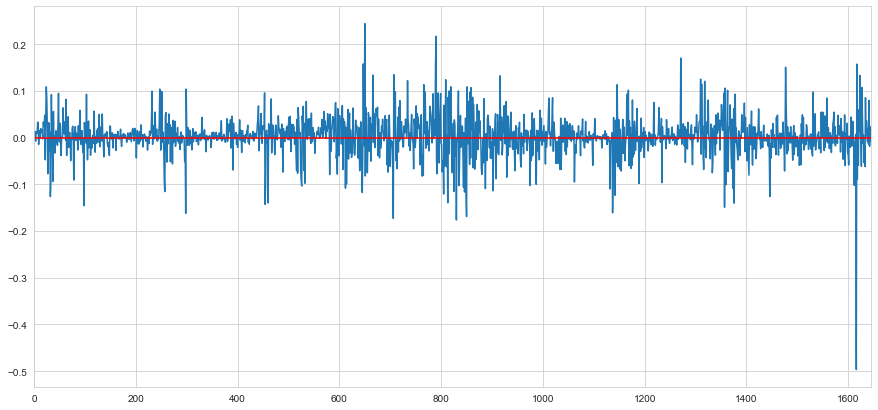

In [171]:
df['LogReturn'].plot(figsize=(15,7))
plt.axhline(0, color='red')
plt.show()

#### In the graph above, we can see the return of money in logarithm method but  we can see this in a different way.

#### Below you will see the method rolling().mean(), we will use this to find out in the graph a rolling median with windows length of 10 and 50 in the column Close.

C:\Users\GEANUM.Fé\Documents\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GEANUM.Fé\Documents\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


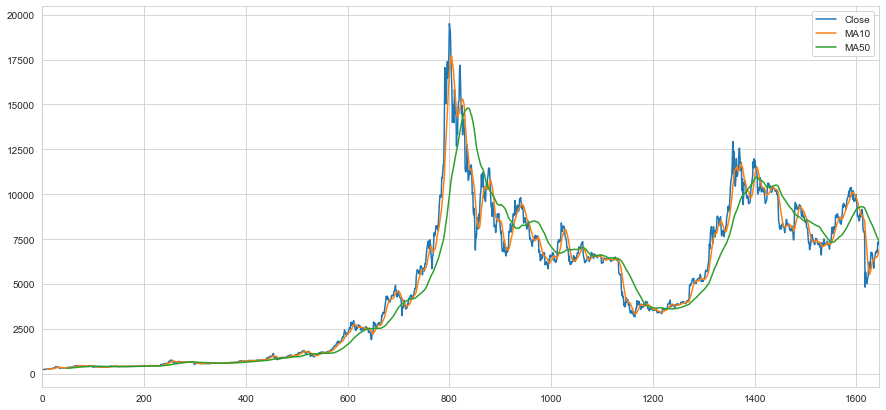

In [115]:
plt.figure(figsize=(15,7))
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['Close'].plot(legend=True)
df['MA10'].plot(legend=True)
df['MA50'].plot(legend=True)
plt.show()

In [119]:
df['Sh'] = [1 if df.loc[ei, 'MA10'] > df.loc[ei, 'MA50'] else 0 for ei in df.index]

C:\Users\GEANUM.Fé\Documents\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Sh']==1 else 0 for ei in df.index]

C:\Users\GEANUM.Fé\Documents\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
len(df)

1646

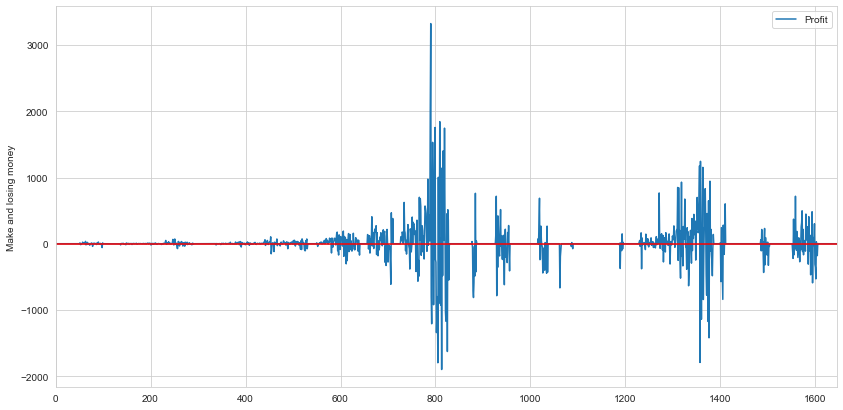

In [145]:
plt.figure(figsize=(14,7))
df['Profit'].plot(legend=True)
plt.axhline(0, color = 'red')
plt.ylabel('Make and losing money')
plt.show()

#### This last graph accurately show the gain and loss of money.

In [131]:
df['Wealth'] = df['Profit'].cumsum()

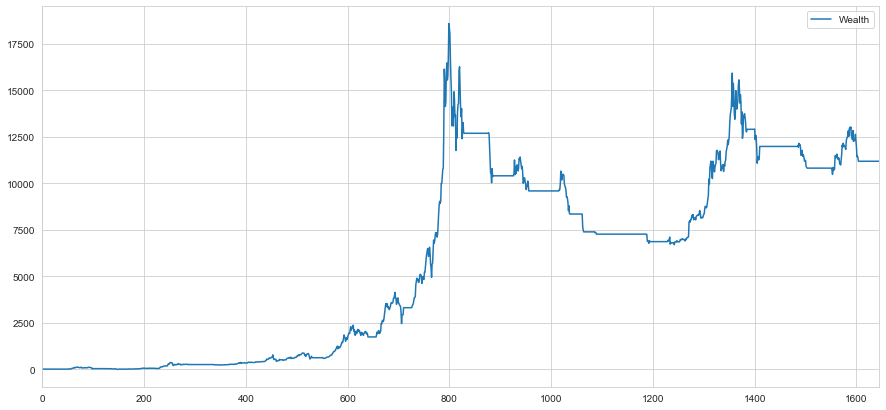

In [142]:
plt.figure(figsize=(15,7))
df['Wealth'].plot(legend=True)
plt.show()

#### The graph above, show us the money gained.

In [154]:
print('Total ofmoney that we win is:', df.loc[df.index[-1], 'Wealth'])
print('Total of money that we spent is:',df.loc[df.index[0], 'Close'])

Total ofmoney that we win is: 11181.660000000005
Total of money that we spent is: 243.95


#### In the last line, we can see how much we gain and spent in this investment.

...

# Thank you for work with me. 